## Importing libraries and reading the dataset

Two datasets will be read in:
1. Processed dataset in which outliers have been treated (read in as df)
2. Processed dataset in which outliers have been left untreated / left as-is (read in as df_outlier)

Processing and EDA was done in Project Notes I python notebook

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve


sns.set_style("white")

In [11]:
df = pd.read_csv("CC_without_outlier.csv")

In [12]:
df.head(5)

,Tenure,City_Tier,CC_Contacted_LY,Service_Score,User_Count,CC_Score,Rev_Permonth,Complain_LY,Days_Since_CC,Cashback,...,Gender_Male,ACSegment_Regular,ACSegment_Regularplus,ACSegment_Super,ACSegment_Superplus,Maritalstatus_Married,Maritalstatus_Single,Logindevice_Mobile,Churn,Clusters
0,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,5.0,160.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0
1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,0.0,121.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0
2,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,3.0,126.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,2
3,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,3.0,134.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1,0
4,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,3.0,130.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1,0


In [13]:
df_outlier = pd.read_csv("CC_with_outlier.csv")

In [14]:
### In the previous notebook, VIF was done successively until all variables had a VIF < 5. The following variables needed to be 
### dropped in order to achieve that. Since this notebook is a continuation, these variables will be dropped from the
### processed datasets that had been written to disk and read here
VIF_variables = ['Cashback', 'Service_Score', 'Clusters']

In [15]:
df.drop(VIF_variables,axis=1,inplace=True)
df_outlier.drop(VIF_variables,axis=1,inplace=True)

In [16]:
df.shape

(11260, 21)

## Train-test split and Scaling the dataset

In [50]:
X = df.drop("Churn", axis=1)
y = df['Churn']

In [51]:
df.shape

(11260, 21)

In [52]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1, stratify=y) 

In [53]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7882, 20), (3378, 20), (7882,), (3378,))

In [54]:
y_train.value_counts(1), y_test.value_counts(1)

(0    0.831642
 1    0.168358
 Name: Churn, dtype: float64,
 0    0.831557
 1    0.168443
 Name: Churn, dtype: float64)

In [55]:
X_train_bkup = X_train.copy()
X_test_bkup = X_test.copy()

In [56]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [57]:
#Scale the training data
X_train = sc.fit_transform(X_train)

# Apply the transformation on the test data
X_test = sc.transform(X_test)

## Common model evaluation function

In [24]:
def model_eval(model,xtrue,ytrue,ypred,probs):
    
    plot_roc_curve(model,xtrue,ytrue,color='red')
    plt.plot([0, 1], [0, 1], linestyle='--');
    
    print('Accuracy : ', model.score(xtrue, ytrue))
    
    plot_confusion_matrix(model,xtrue,ytrue, colorbar=False);
    
    print(classification_report(ytrue, ypred));

    # # calculate AUC
    auc = roc_auc_score(ytrue, probs)
    print('AUC: %.3f' % auc);

## Artificial Neural Network - ANN

In [16]:
from sklearn.neural_network import MLPClassifier

### ANN_model1 : Base model

In [17]:
ANN_model1 = MLPClassifier(verbose=True,random_state=123, max_iter=1000)

ANN_model1.fit(X_train, y_train)

Iteration 1, loss = 0.54730829
Iteration 2, loss = 0.37311983
Iteration 3, loss = 0.32697236
Iteration 4, loss = 0.30581207
Iteration 5, loss = 0.29313177
Iteration 6, loss = 0.28428202
Iteration 7, loss = 0.27759361
Iteration 8, loss = 0.27176371
Iteration 9, loss = 0.26677594
Iteration 10, loss = 0.26302297
Iteration 11, loss = 0.25913046
Iteration 12, loss = 0.25511924
Iteration 13, loss = 0.25152569
Iteration 14, loss = 0.24820486
Iteration 15, loss = 0.24502794
Iteration 16, loss = 0.24207440
Iteration 17, loss = 0.23867971
Iteration 18, loss = 0.23566498
Iteration 19, loss = 0.23291335
Iteration 20, loss = 0.22986397
Iteration 21, loss = 0.22727756
Iteration 22, loss = 0.22421487
Iteration 23, loss = 0.22137573
Iteration 24, loss = 0.21872591
Iteration 25, loss = 0.21631524
Iteration 26, loss = 0.21342779
Iteration 27, loss = 0.21118314
Iteration 28, loss = 0.20803451
Iteration 29, loss = 0.20580607
Iteration 30, loss = 0.20368880
Iteration 31, loss = 0.20069446
Iteration 32, los

Iteration 255, loss = 0.03466355
Iteration 256, loss = 0.03372990
Iteration 257, loss = 0.03427227
Iteration 258, loss = 0.03379262
Iteration 259, loss = 0.03342728
Iteration 260, loss = 0.03320761
Iteration 261, loss = 0.03335739
Iteration 262, loss = 0.03271667
Iteration 263, loss = 0.03212381
Iteration 264, loss = 0.03201976
Iteration 265, loss = 0.03194530
Iteration 266, loss = 0.03153111
Iteration 267, loss = 0.03199798
Iteration 268, loss = 0.03152230
Iteration 269, loss = 0.03120995
Iteration 270, loss = 0.03087537
Iteration 271, loss = 0.03083048
Iteration 272, loss = 0.03073331
Iteration 273, loss = 0.03037466
Iteration 274, loss = 0.03035951
Iteration 275, loss = 0.03013754
Iteration 276, loss = 0.02985830
Iteration 277, loss = 0.02996240
Iteration 278, loss = 0.02963838
Iteration 279, loss = 0.02927592
Iteration 280, loss = 0.02928675
Iteration 281, loss = 0.02896417
Iteration 282, loss = 0.02885053
Iteration 283, loss = 0.02874767
Iteration 284, loss = 0.02847660
Iteration 

Iteration 506, loss = 0.01020194
Iteration 507, loss = 0.00997984
Iteration 508, loss = 0.01055114
Iteration 509, loss = 0.01032813
Iteration 510, loss = 0.01037093
Iteration 511, loss = 0.01033917
Iteration 512, loss = 0.01009986
Iteration 513, loss = 0.01057805
Iteration 514, loss = 0.01071438
Iteration 515, loss = 0.01013065
Iteration 516, loss = 0.01034664
Iteration 517, loss = 0.00992944
Iteration 518, loss = 0.00992018
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(max_iter=1000, random_state=123, verbose=True)

In [18]:
### Predicting on train and test dataset

ANN_model1_ytrain_pred = ANN_model1.predict(X_train)
ANN_model1_ytest_pred = ANN_model1.predict(X_test)

In [19]:
## Predicting probabilities on train dataset
ANN_model1_trainprobs = ANN_model1.predict_proba(X_train)
# # keep probabilities for the positive outcome only
ANN_model1_trainprobs = ANN_model1_trainprobs[:, 1]

## Predicting probabilities on test dataset
ANN_model1_testprobs = ANN_model1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
ANN_model1_testprobs = ANN_model1_testprobs[:, 1]

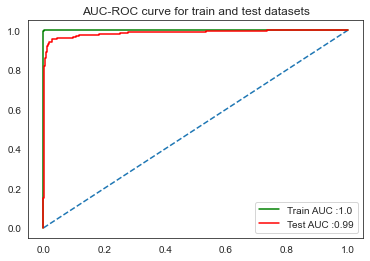

In [20]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, ANN_model1_trainprobs),2)
test_auc = round(roc_auc_score(y_test, ANN_model1_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ANN_model1_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, ANN_model1_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9989850291804111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882

AUC: 1.000


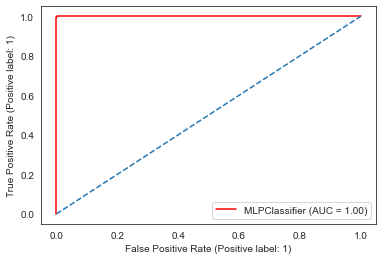

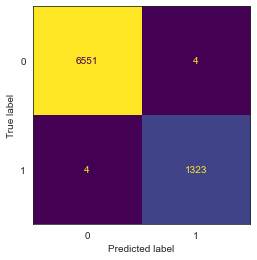

In [21]:
### Evaluation of training dataset
model_eval(ANN_model1, X_train, y_train, ANN_model1_ytrain_pred, ANN_model1_trainprobs)

Accuracy :  0.9751332149200711
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2809
           1       0.94      0.91      0.93       569

    accuracy                           0.98      3378
   macro avg       0.96      0.95      0.96      3378
weighted avg       0.97      0.98      0.98      3378

AUC: 0.987


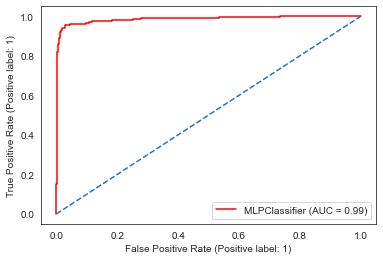

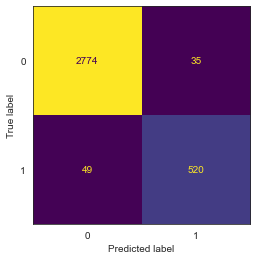

In [22]:
### Evaluation of test dataset
model_eval(ANN_model1, X_test, y_test, ANN_model1_ytest_pred, ANN_model1_testprobs)

**Observations:** We can see that the model has completely overfit on the training dataset. We will reduce the variance of the model by the following two methods:
1) In ANN_model3, we'll increase the alpha with all other parameters remaining same as base model and check the performance. 
Alpha is a parameter for regularization term, aka penalty term, that combats overfitting by constraining the size of the weights. Increasing alpha may fix high variance (a sign of overfitting) by encouraging smaller weights, resulting in a decision boundary plot that appears with lesser curvatures. (Reference:https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html)

2) Also in ANN_model2 GridsearchCV, the hidden layer sizes are chosen to be less than or equal to default hidden layer sizes. 

### ANN_model2 : Hyperparameter tuning using GridSearchCV

In [23]:
param_grid = {
    'hidden_layer_sizes': [80,90,100], #[100,(100,200,150)]
    'max_iter': [1000,2000],
    'solver': ['sgd','adam','lbfgs'],
    'tol': [0.01,0.001],#0.001,0.0001
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01]
}

nncl = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = nncl, 
                           param_grid = param_grid, cv = 5, scoring='f1') 

In [24]:
## grid_search.fit(X_train, y_train) ##Taken down the best parameters and commented so that reruns do not take much time

In [25]:
#grid_search.best_params_

In [26]:
#best_grid = grid_search.best_estimator_

In [27]:
## Best grid parameters are as follows
#{'activation': 'tanh',
# 'alpha': 0.0001,
# 'hidden_layer_sizes': 100,
# 'max_iter': 1000,
# 'solver': 'adam',
# 'tol': 0.001}

In [28]:
ANN_model2 = MLPClassifier(activation='tanh', alpha=0.0001, hidden_layer_sizes=100, solver='adam', tol=0.001, verbose=True,random_state=123, max_iter=1000)

ANN_model2.fit(X_train, y_train)

Iteration 1, loss = 0.58073468
Iteration 2, loss = 0.39016734
Iteration 3, loss = 0.32860950
Iteration 4, loss = 0.30437462
Iteration 5, loss = 0.29385223
Iteration 6, loss = 0.28862211
Iteration 7, loss = 0.28588929
Iteration 8, loss = 0.28363885
Iteration 9, loss = 0.28156808
Iteration 10, loss = 0.28079954
Iteration 11, loss = 0.27959285
Iteration 12, loss = 0.27718022
Iteration 13, loss = 0.27572068
Iteration 14, loss = 0.27422276
Iteration 15, loss = 0.27245275
Iteration 16, loss = 0.27077612
Iteration 17, loss = 0.26862414
Iteration 18, loss = 0.26665580
Iteration 19, loss = 0.26462949
Iteration 20, loss = 0.26229221
Iteration 21, loss = 0.26085314
Iteration 22, loss = 0.25784742
Iteration 23, loss = 0.25531652
Iteration 24, loss = 0.25260830
Iteration 25, loss = 0.25051310
Iteration 26, loss = 0.24728095
Iteration 27, loss = 0.24525073
Iteration 28, loss = 0.24172054
Iteration 29, loss = 0.23911677
Iteration 30, loss = 0.23622495
Iteration 31, loss = 0.23284465
Iteration 32, los

MLPClassifier(activation='tanh', hidden_layer_sizes=100, max_iter=1000,
              random_state=123, tol=0.001, verbose=True)

In [29]:
### Predicting on train and test dataset

ANN_model2_ytrain_pred = ANN_model2.predict(X_train)
ANN_model2_ytest_pred = ANN_model2.predict(X_test)

In [30]:
## Predicting probabilities on train dataset
ANN_model2_trainprobs = ANN_model2.predict_proba(X_train)
# # keep probabilities for the positive outcome only
ANN_model2_trainprobs = ANN_model2_trainprobs[:, 1]

## Predicting probabilities on test dataset
ANN_model2_testprobs = ANN_model2.predict_proba(X_test)
# # keep probabilities for the positive outcome only
ANN_model2_testprobs = ANN_model2_testprobs[:, 1]

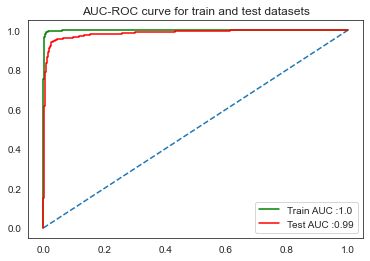

In [31]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, ANN_model2_trainprobs),2)
test_auc = round(roc_auc_score(y_test, ANN_model2_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ANN_model2_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, ANN_model2_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9909921339761482
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6555
           1       0.98      0.97      0.97      1327

    accuracy                           0.99      7882
   macro avg       0.98      0.98      0.98      7882
weighted avg       0.99      0.99      0.99      7882

AUC: 0.999


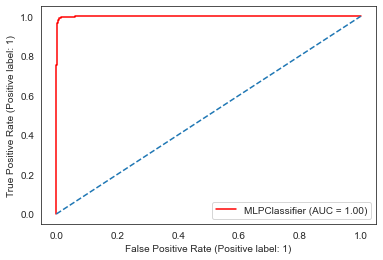

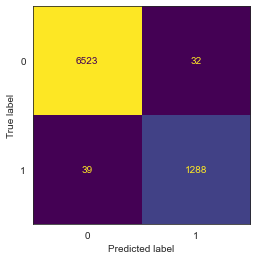

In [32]:
### Evaluation of training dataset
model_eval(ANN_model2, X_train, y_train, ANN_model2_ytrain_pred, ANN_model2_trainprobs)

Accuracy :  0.9686204854943754
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2809
           1       0.92      0.89      0.91       569

    accuracy                           0.97      3378
   macro avg       0.95      0.94      0.94      3378
weighted avg       0.97      0.97      0.97      3378

AUC: 0.985


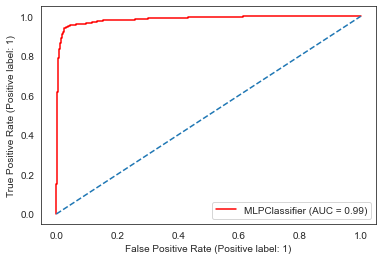

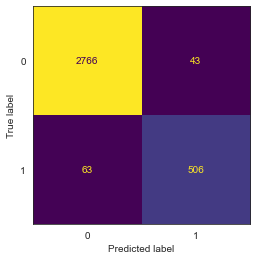

In [33]:
### Evaluation of test dataset
model_eval(ANN_model2, X_test, y_test, ANN_model2_ytest_pred, ANN_model2_testprobs)

### ANN_model3: Base model with penalty to reduce overfitting

In [34]:
ANN_model3 = MLPClassifier(verbose=True,random_state=123, max_iter=1000, alpha=0.05)
ANN_model3.fit(X_train, y_train)

Iteration 1, loss = 0.55191491
Iteration 2, loss = 0.37802161
Iteration 3, loss = 0.33221251
Iteration 4, loss = 0.31124320
Iteration 5, loss = 0.29866769
Iteration 6, loss = 0.28990020
Iteration 7, loss = 0.28329650
Iteration 8, loss = 0.27755017
Iteration 9, loss = 0.27271204
Iteration 10, loss = 0.26905505
Iteration 11, loss = 0.26529485
Iteration 12, loss = 0.26142663
Iteration 13, loss = 0.25800773
Iteration 14, loss = 0.25483814
Iteration 15, loss = 0.25184751
Iteration 16, loss = 0.24910075
Iteration 17, loss = 0.24590072
Iteration 18, loss = 0.24312839
Iteration 19, loss = 0.24059261
Iteration 20, loss = 0.23781917
Iteration 21, loss = 0.23548479
Iteration 22, loss = 0.23267727
Iteration 23, loss = 0.23016422
Iteration 24, loss = 0.22778666
Iteration 25, loss = 0.22567977
Iteration 26, loss = 0.22310653
Iteration 27, loss = 0.22116382
Iteration 28, loss = 0.21829408
Iteration 29, loss = 0.21634482
Iteration 30, loss = 0.21445816
Iteration 31, loss = 0.21172902
Iteration 32, los

Iteration 256, loss = 0.08261551
Iteration 257, loss = 0.08344544
Iteration 258, loss = 0.08274907
Iteration 259, loss = 0.08266683
Iteration 260, loss = 0.08227354
Iteration 261, loss = 0.08244525
Iteration 262, loss = 0.08229548
Iteration 263, loss = 0.08168981
Iteration 264, loss = 0.08165615
Iteration 265, loss = 0.08177172
Iteration 266, loss = 0.08118867
Iteration 267, loss = 0.08165950
Iteration 268, loss = 0.08140073
Iteration 269, loss = 0.08147043
Iteration 270, loss = 0.08121529
Iteration 271, loss = 0.08118736
Iteration 272, loss = 0.08100668
Iteration 273, loss = 0.08061227
Iteration 274, loss = 0.08091852
Iteration 275, loss = 0.08060144
Iteration 276, loss = 0.08040162
Iteration 277, loss = 0.08062470
Iteration 278, loss = 0.08042469
Iteration 279, loss = 0.08048469
Iteration 280, loss = 0.08028642
Iteration 281, loss = 0.08005455
Iteration 282, loss = 0.07993928
Iteration 283, loss = 0.07989500
Iteration 284, loss = 0.07953921
Iteration 285, loss = 0.07976962
Iteration 

MLPClassifier(alpha=0.05, max_iter=1000, random_state=123, verbose=True)

In [35]:
### Predicting on train and test dataset
ANN_model3_ytrain_pred = ANN_model3.predict(X_train)
ANN_model3_ytest_pred = ANN_model3.predict(X_test)

## Predicting probabilities on train dataset
ANN_model3_trainprobs = ANN_model3.predict_proba(X_train)
# # keep probabilities for the positive outcome only
ANN_model3_trainprobs = ANN_model3_trainprobs[:, 1]

## Predicting probabilities on test dataset
ANN_model3_testprobs = ANN_model3.predict_proba(X_test)
# # keep probabilities for the positive outcome only
ANN_model3_testprobs = ANN_model3_testprobs[:, 1]

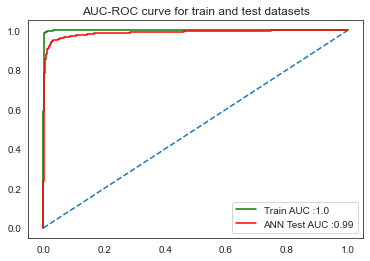

In [36]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, ANN_model3_trainprobs),2)
test_auc = round(roc_auc_score(y_test, ANN_model3_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_ann = 'ANN Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ANN_model3_trainprobs)
fpr_test_ann, tpr_test_ann, thresholds_test_ann = roc_curve(y_test, ANN_model3_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_ann, tpr_test_ann, color='red', label=test_label_ann)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9946714031971581
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       0.98      0.98      0.98      1327

    accuracy                           0.99      7882
   macro avg       0.99      0.99      0.99      7882
weighted avg       0.99      0.99      0.99      7882

AUC: 0.999


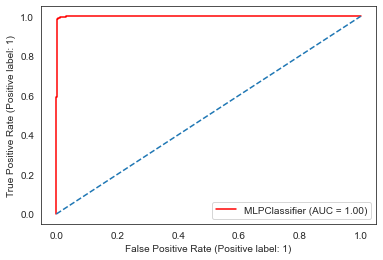

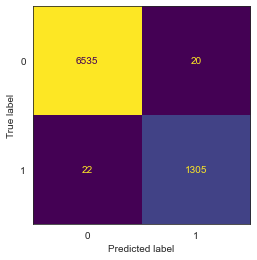

In [37]:
### Evaluation of training dataset
model_eval(ANN_model3, X_train, y_train, ANN_model3_ytrain_pred, ANN_model3_trainprobs)

Accuracy :  0.9727649496743636
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2809
           1       0.94      0.90      0.92       569

    accuracy                           0.97      3378
   macro avg       0.96      0.94      0.95      3378
weighted avg       0.97      0.97      0.97      3378

AUC: 0.987


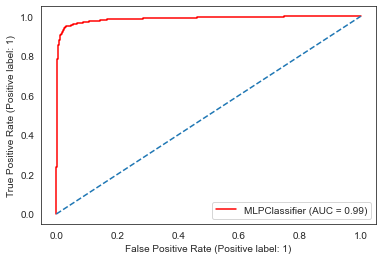

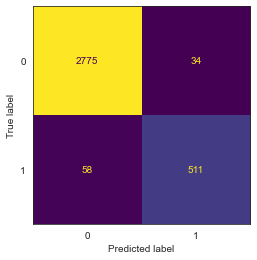

In [38]:
### Evaluation of test dataset
model_eval(ANN_model3, X_test, y_test, ANN_model3_ytest_pred, ANN_model3_testprobs)

### Feature importance for the best ANN model

In [39]:
from sklearn.inspection import permutation_importance

In [40]:
imps = permutation_importance(ANN_model3, X_test, y_test)

C:\Users\91984\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1490: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.barh(x, y, w, left=start, log=log, **kwds)


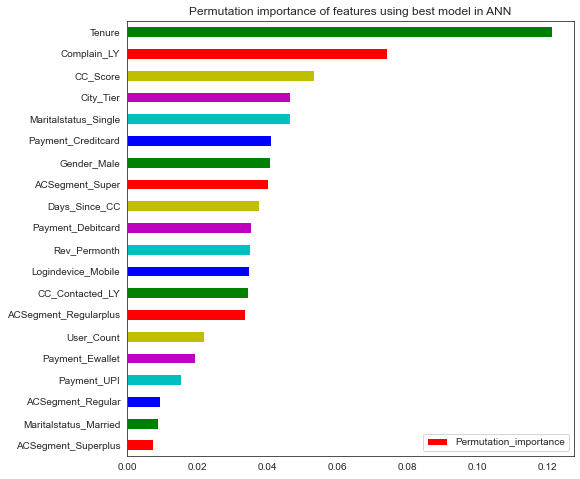

In [41]:
imp_df = pd.DataFrame(imps.importances_mean, columns=['Permutation_importance'], index = X.columns)
## plotting graph
imp_df = imp_df.sort_values(by='Permutation_importance')
my_colors = 'rgbcmy'
#my_colors = ['red','green','blue','black','orange','cyan','magenta','brown']
imp_df.plot(kind='barh', color = my_colors, figsize=(8,8))
plt.title("Permutation importance of features using best model in ANN")
plt.show();

## K-Nearest Neighbour method   KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

### KNN_model1: Base model

In [43]:
KNN_model1=KNeighborsClassifier() # number of neighbours by default is 5
KNN_model1.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
### Predicting on train and test dataset
KNN_model1_ytrain_pred = KNN_model1.predict(X_train)
KNN_model1_ytest_pred = KNN_model1.predict(X_test)

## Predicting probabilities on train dataset
KNN_model1_trainprobs = KNN_model1.predict_proba(X_train)
# # keep probabilities for the positive outcome only
KNN_model1_trainprobs = KNN_model1_trainprobs[:, 1]

## Predicting probabilities on test dataset
KNN_model1_testprobs = KNN_model1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
KNN_model1_testprobs = KNN_model1_testprobs[:, 1]

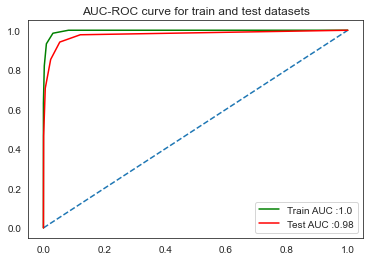

In [45]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, KNN_model1_trainprobs),2)
test_auc = round(roc_auc_score(y_test, KNN_model1_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, KNN_model1_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, KNN_model1_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9803349403704643
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6555
           1       0.95      0.93      0.94      1327

    accuracy                           0.98      7882
   macro avg       0.97      0.96      0.96      7882
weighted avg       0.98      0.98      0.98      7882

AUC: 0.997


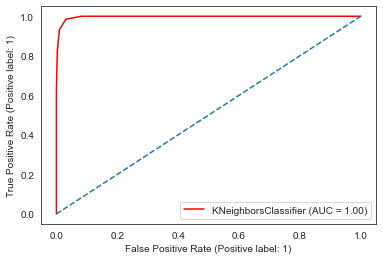

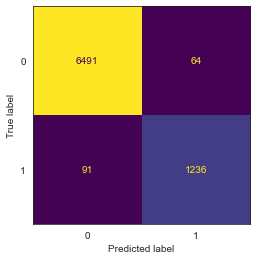

In [46]:
### Evaluation of training dataset
model_eval(KNN_model1, X_train, y_train, KNN_model1_ytrain_pred, KNN_model1_trainprobs)

Accuracy :  0.9552989934872705
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2809
           1       0.88      0.85      0.87       569

    accuracy                           0.96      3378
   macro avg       0.92      0.91      0.92      3378
weighted avg       0.95      0.96      0.96      3378

AUC: 0.977


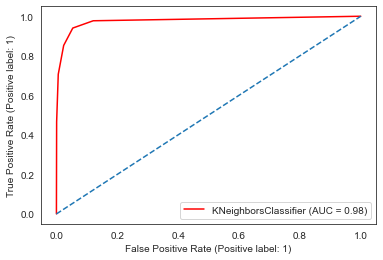

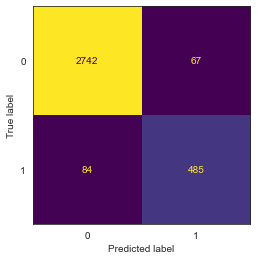

In [47]:
### Evaluation of test dataset
model_eval(KNN_model1, X_test, y_test, KNN_model1_ytest_pred, KNN_model1_testprobs)

### Tuning KNN with varying values of K

In [48]:
from sklearn.metrics import f1_score

In [49]:
# empty list that will hold accuracy scores
ac_f1scores = []
ac_scores = []

# perform accuracy metrics for values from 1,3,5....25
for k in range(1,25,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_ytest_pred = knn.predict(X_test)
    # evaluate test f1_score, accuracy
    f1scores = f1_score(y_test, knn_ytest_pred)
    scores = knn.score(X_test, y_test)
    ac_f1scores.append(f1scores)
    ac_scores.append(scores)

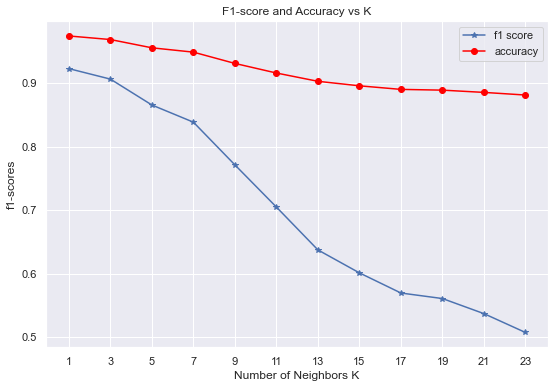

In [50]:
### Plot f1-score, accuracy against k
sns.set()
plt.figure(figsize=(9,6))
plt.plot(range(1,25,2), ac_f1scores, marker='*', label='f1 score')
plt.plot(range(1,25,2), ac_scores, marker='o', color='red', label='accuracy')
plt.xlabel('Number of Neighbors K')
plt.xticks(range(1,25,2))
plt.ylabel('f1-scores')
plt.legend()
plt.title("F1-score and Accuracy vs K");

**Observations**: In case of too small values of k, the algorithm becomes sensitive to noise. Hence, 5 is chosen as the optimum k-value

### KNN_model2: Gridsearch with KNN best N

In [51]:
param_grid = {
    'weights': ['uniform', 'distance'], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2],
    'metric': ['minkowski','chebyshev']
}

KNN = KNeighborsClassifier()

grid_search = GridSearchCV(estimator = KNN, param_grid = param_grid, cv = 3, scoring='f1') 

In [52]:
### grid_search.fit(X_train, y_train)  ### Commenting once best parameters have been found as it takes time to run everytime

In [53]:
#grid_search.best_params_
### grid_search.best_params_   {'algorithm': 'auto', 'metric': 'minkowski', 'p': 1, 'weights': 'distance'}

In [54]:
KNN_model2 = KNeighborsClassifier(algorithm = 'auto', metric= 'minkowski', p= 1, weights= 'distance') ##default n_neighbours=5

In [55]:
KNN_model2.fit(X_train, y_train)

KNeighborsClassifier(p=1, weights='distance')

In [56]:
### Predicting on train and test dataset
KNN_model2_ytrain_pred = KNN_model2.predict(X_train)
KNN_model2_ytest_pred = KNN_model2.predict(X_test)

## Predicting probabilities on train dataset
KNN_model2_trainprobs = KNN_model2.predict_proba(X_train)
# # keep probabilities for the positive outcome only
KNN_model2_trainprobs = KNN_model2_trainprobs[:, 1]

## Predicting probabilities on test dataset
KNN_model2_testprobs = KNN_model2.predict_proba(X_test)
# # keep probabilities for the positive outcome only
KNN_model2_testprobs = KNN_model2_testprobs[:, 1]


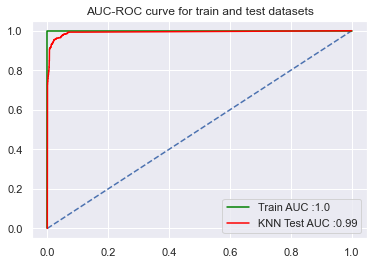

In [57]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, KNN_model2_trainprobs),2)
test_auc = round(roc_auc_score(y_test, KNN_model2_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_knn = 'KNN Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, KNN_model2_trainprobs)
fpr_test_knn, tpr_test_knn, thresholds_test_knn = roc_curve(y_test, KNN_model2_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_knn, tpr_test_knn, color='red', label=test_label_knn)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();


Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882

AUC: 1.000


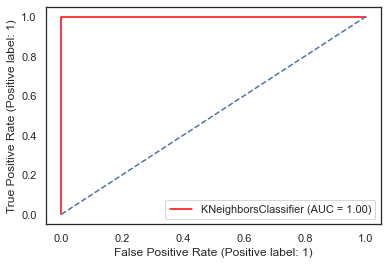

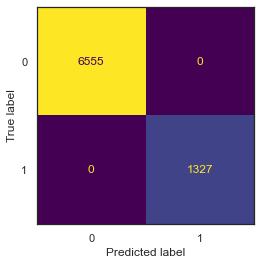

In [58]:
### Evaluation of training dataset
sns.set_style("white")
model_eval(KNN_model2, X_train, y_train, KNN_model2_ytrain_pred, KNN_model2_trainprobs)

Accuracy :  0.9772054470100652
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2809
           1       0.93      0.93      0.93       569

    accuracy                           0.98      3378
   macro avg       0.96      0.96      0.96      3378
weighted avg       0.98      0.98      0.98      3378

AUC: 0.992


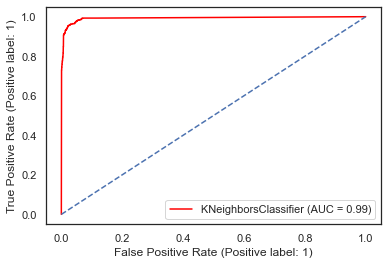

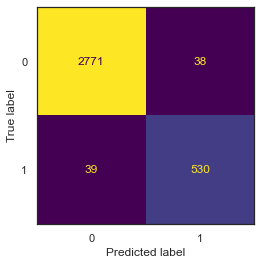

In [59]:
### Evaluation of test dataset
model_eval(KNN_model2, X_test, y_test, KNN_model2_ytest_pred, KNN_model2_testprobs)

**Observations** Train dataset has overfit because of the less number of neighbours selection. Let us try with different neighbours again using Gridsearch's best parameters

### Varying N_neighbours again for best Grid search

In [60]:
# empty list that will hold accuracy scores
ac_f1scores = []
ac_scores = []

# perform accuracy metrics for values from 1,3,5....25
for k in range(1,25,2):
    knn = KNeighborsClassifier(n_neighbors=k,algorithm = 'auto', metric= 'minkowski', p= 1, weights= 'distance')
    knn.fit(X_train, y_train)
    knn_ytest_pred = knn.predict(X_test)
    # evaluate test f1_score, accuracy
    f1scores = f1_score(y_test, knn_ytest_pred) #f1_Score default reports f1 for class label=1 when it is binary class
    scores = knn.score(X_test, y_test)
    ac_f1scores.append(f1scores)
    ac_scores.append(scores)

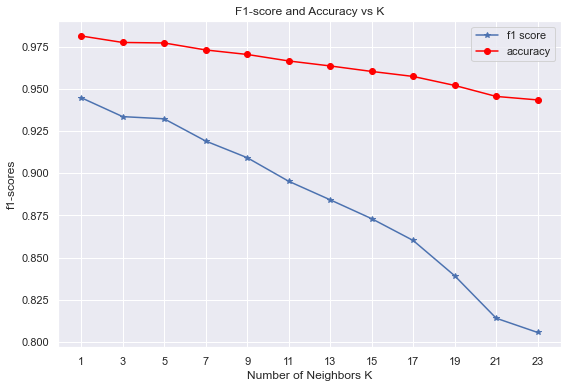

In [61]:
### Plot f1-score, accuracy against k
sns.set()
plt.figure(figsize=(9,6))
plt.plot(range(1,25,2), ac_f1scores, marker='*', label='f1 score')
plt.plot(range(1,25,2), ac_scores, marker='o', color='red', label='accuracy')
plt.xlabel('Number of Neighbors K')
plt.xticks(range(1,25,2))
plt.ylabel('f1-scores')
plt.legend()
plt.title("F1-score and Accuracy vs K");

sns.set_style('white')

**Observations**: 5 seems to be the optimum value but for that, train dataset has fully grown. 
KNN_model2 has the best grid with best neighbours. Even though the training data performance has fully grown, test data is not far behind and has a difference of 7%. Before determining this is the best model, let's use cross validation on train data and cv on full data to see if the f1-score of 93% holds true. 

### Using cross validation 
To see if test dataset performance (93% f1 score) holds in train data folds and in total data 5 folds

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
## 5-fold cross validation on train data
clf = KNeighborsClassifier(n_neighbors=5,algorithm = 'auto', metric= 'minkowski', p= 1, weights= 'distance')
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1')
scores, scores.mean()

(array([0.9271028 , 0.88715953, 0.89312977, 0.92775665, 0.92979127]),
 0.9129880066288516)

In [64]:
## 5-fold cross validation on full data
clf = KNeighborsClassifier(n_neighbors=5,algorithm = 'auto', metric= 'minkowski', p= 1, weights= 'distance')
scores = cross_val_score(clf, X, y, cv=5, scoring='f1')
scores, scores.mean()

(array([0.90358127, 0.93530997, 0.93405114, 0.91005291, 0.84656085]),
 0.9059112281775953)

**Observations**: The cross validation scores on train dataset and entire dataset for cv=5 are comparable to test dataset but within the folds, the differences are quite high and there are some inconsistencies within folds. Hence K-means may not always give predictable results as in testing

## Ensemble model - Random Forest

### RF_model1: Base model without outliers and scaled data

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
#Build a RandomForestCassifier and fit it on the training data
RF_model1 = RandomForestClassifier(random_state=123, oob_score=True)
RF_model1 = RF_model1.fit(X_train, y_train)

In [67]:
RF_model1.oob_score_

0.973483887338239

In [68]:
### Predicting on train and test dataset
RF_model1_ytrain_pred = RF_model1.predict(X_train)
RF_model1_ytest_pred = RF_model1.predict(X_test)

## Predicting probabilities on train dataset
RF_model1_trainprobs = RF_model1.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF_model1_trainprobs = RF_model1_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF_model1_testprobs = RF_model1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF_model1_testprobs = RF_model1_testprobs[:, 1]

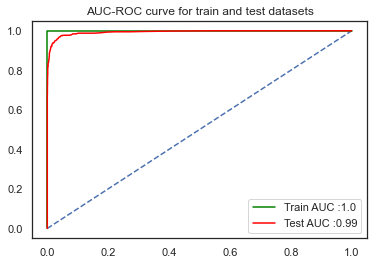

In [69]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF_model1_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF_model1_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF_model1_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, RF_model1_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();


Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882

AUC: 1.000


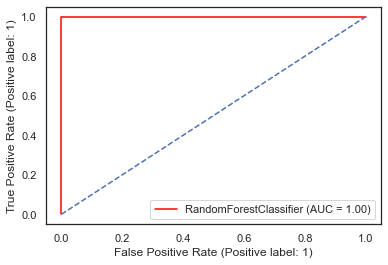

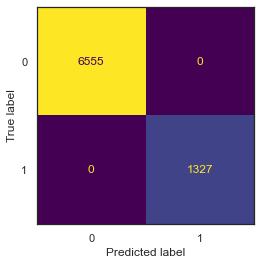

In [70]:
### Evaluation of training dataset
model_eval(RF_model1, X_train, y_train, RF_model1_ytrain_pred, RF_model1_trainprobs)

Accuracy :  0.9715808170515098
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2809
           1       0.97      0.86      0.91       569

    accuracy                           0.97      3378
   macro avg       0.97      0.93      0.95      3378
weighted avg       0.97      0.97      0.97      3378

AUC: 0.993


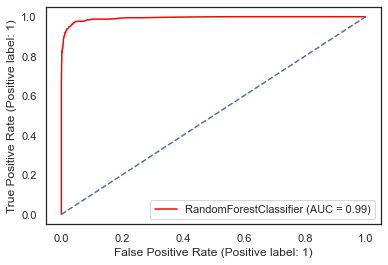

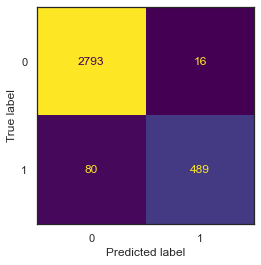

In [71]:
### Evaluation of test dataset
model_eval(RF_model1, X_test, y_test, RF_model1_ytest_pred, RF_model1_testprobs)

In [72]:
pd.DataFrame(RF_model1.feature_importances_, index=X.columns, columns=['Feature importance'])

,Feature importance
Tenure,0.271727
City_Tier,0.034345
CC_Contacted_LY,0.098291
User_Count,0.051148
CC_Score,0.073772
Rev_Permonth,0.075198
Complain_LY,0.068077
Days_Since_CC,0.088242
Payment_Creditcard,0.024044
Payment_Debitcard,0.021274


**Observations**: The model has overfit on train dataset as it gives a recall score of 1 in train dataset and 0.86 in test dataset. We will do a gridsearch to determine the best RF model.

### RF_model2: Base model with outliers and unscaled data

**Random forest is outlier resistant and does not require scaling. Hence the dataset with outliers will be used for this model**

In [73]:
X_ot = df_outlier.drop('Churn',axis=1)
y_ot = df_outlier['Churn']

In [74]:
# Split X and y into training and test set in 70:30 ratio
Xot_train, Xot_test, yot_train, yot_test = train_test_split(X_ot, y_ot, test_size=0.30 , random_state=1, stratify=y_ot) 

In [75]:
#Build a RandomForestCassifier andfit it on the training data
RF_model2 = RandomForestClassifier(random_state=123, oob_score=True)
RF_model2 = RF_model2.fit(Xot_train, yot_train)

In [76]:
### Predicting on train and test dataset
RF_model2_ytrain_pred = RF_model2.predict(Xot_train)
RF_model2_ytest_pred = RF_model2.predict(Xot_test)

## Predicting probabilities on train dataset
RF_model2_trainprobs = RF_model2.predict_proba(Xot_train)
# # keep probabilities for the positive outcome only
RF_model2_trainprobs = RF_model2_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF_model2_testprobs = RF_model2.predict_proba(Xot_test)
# # keep probabilities for the positive outcome only
RF_model2_testprobs = RF_model2_testprobs[:, 1]

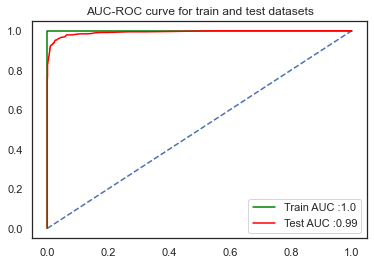

In [77]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(yot_train, RF_model2_trainprobs),2)
test_auc = round(roc_auc_score(yot_test, RF_model2_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(yot_train, RF_model2_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(yot_test, RF_model2_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882

AUC: 1.000


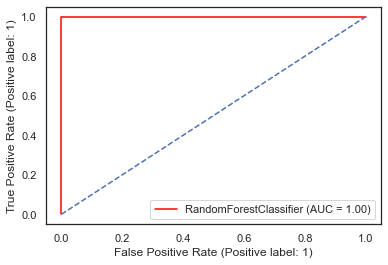

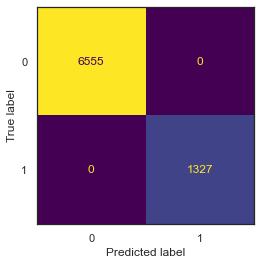

In [78]:
### Evaluation of training dataset
model_eval(RF_model2, Xot_train, yot_train, RF_model2_ytrain_pred, RF_model2_trainprobs)

Accuracy :  0.9736530491415039
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2809
           1       0.98      0.86      0.92       569

    accuracy                           0.97      3378
   macro avg       0.97      0.93      0.95      3378
weighted avg       0.97      0.97      0.97      3378

AUC: 0.993


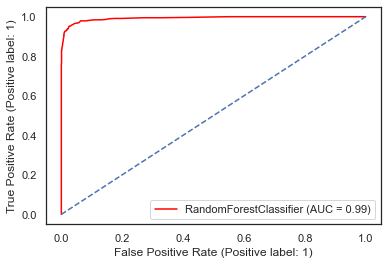

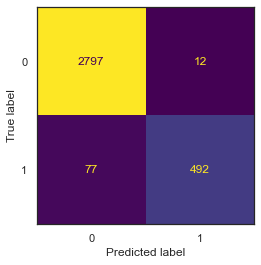

In [79]:
### Evaluation of test dataset
model_eval(RF_model2, Xot_test, yot_test, RF_model2_ytest_pred, RF_model2_testprobs)

### RF_model3: Hyper parameter tuned model using GridSearchCV
Using data with outliers and not scaled

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid1 = {
    'max_depth': [5,7,10],
    'max_features': [4,5,6],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [101,201,301]
}
###Best parameters for above grid: RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=5,
#                       min_samples_split=50, n_estimators=101, random_state=0)  Best score : 69.59

param_grid2 = {
    'max_depth': [10,11,12],
    'max_features': [6,7,8],
    'min_samples_leaf': [4,5],
    'min_samples_split': [40,50],
    'n_estimators': [51,71,101]
}

###Best parameters for above grid: {'max_depth': 11, 'max_features': 8, 'min_samples_leaf': 4, 'min_samples_split': 40,
 #'n_estimators': 101}  f1-score 0.72
    
param_grid3 = {
    'max_depth': [11],
    'max_features': [8,9,10],
    'min_samples_leaf': [4],
    'min_samples_split': [40],
    'n_estimators': [101,151]
}

###Best parameters for above grid: {'max_depth': 11, 'max_features': 10, 'min_samples_leaf': 4, 'min_samples_split': 40,
 #'n_estimators': 101}  f1-score 0.728

param_grid4 = {
    'max_depth': [11],
    'max_features': [10,12,14],
    'min_samples_leaf': [4],
    'min_samples_split': [40],
    'n_estimators': [101]
}
###Best parameters for above grid: {'max_depth': 11, 'max_features': 14, 'min_samples_leaf': 4, 'min_samples_split': 40,
 #'n_estimators': 101}  f1-score 0.741
    

param_grid5 = {
    'max_depth': [11],
    'max_features': [14,15,16],
    'min_samples_leaf': [4],
    'min_samples_split': [40],
    'n_estimators': [101]
}
###Best parameters for above grid: {'max_depth': 11, 'max_features': 14, 'min_samples_leaf': 4, 'min_samples_split': 40,
 #'n_estimators': 101}  f1-score 0.741

param_grid6 = {
    'max_depth': [13],
    'max_features': [16],
    'min_samples_leaf': [3],
    'min_samples_split': [30],
    'n_estimators': [101]
}
###Best parameters for above grid: {'max_depth': 13, 'max_features': 16, 'min_samples_leaf': 3, 'min_samples_split': 30,
 #'n_estimators': 101}  f1-score 0.756
    

param_grid7 = {
    'max_depth': [13,14,15],
    'max_features': [15,16],
    'min_samples_leaf': [3],
    'min_samples_split': [30,20],
    'n_estimators': [101]
}
###Best parameters for above grid: {'max_depth': 15, 'max_features': 16, 'min_samples_leaf': 3, 'min_samples_split': 20,
 #'n_estimators': 101}  f1-score 0.789

param_grid8 = {
    'max_depth': [15,16,17],
    'max_features': [16,17],
    'min_samples_leaf': [3],
    'min_samples_split': [20,10],
    'n_estimators': [101]
}
###Best parameters for above grid: {'max_depth': 17, 'max_features': 16, 'min_samples_leaf': 3, 'min_samples_split': 10,
 #'n_estimators': 101}  f1-score 0.831

param_grid9 = {
    'max_depth': [17,18,19],
    'max_features': [16],
    'min_samples_leaf': [3],
    'min_samples_split': [10,8],
    'n_estimators': [101]
}
###Best parameters for above grid: {'max_depth': 18, 'max_features': 16, 'min_samples_leaf': 3, 'min_samples_split': 8,
 #'n_estimators': 101}  f1-score 0.8428
    

param_grid10 = {
    'max_depth': [18,19],
    'max_features': [16,17],
    'min_samples_leaf': [2,3],
    'min_samples_split': [8,7,6],
    'n_estimators': [101,151]
}
###Best parameters for above grid: {'max_depth': 19, 'max_features': 16, 'min_samples_leaf': 2, 'min_samples_split': 6,
 #'n_estimators': 151}  f1-score 0.8714

param_grid11 = {
    'max_depth': [19,20,21],
    'max_features': [16],
    'min_samples_leaf': [2],
    'min_samples_split': [6],
    'n_estimators': [121,151,171]
}
###Best parameters for above grid: {'max_depth': 19, 'max_features': 16, 'min_samples_leaf': 2, 'min_samples_split': 6,
# 'n_estimators': 121}  f1-score 0.8730

param_grid12 = {
    'max_depth': [19],
    'max_features': [16],
    'min_samples_leaf': [2],
    'min_samples_split': [4,5,6],
    'n_estimators': [121]
}
###Best parameters for above grid: {'max_depth': 19, 'max_features': 16, 'min_samples_leaf': 2, 'min_samples_split': 4,
# 'n_estimators': 121}  f1-score 0.8797 on dataset with outliers   f1_score = .8809 on dataset without outliers and scaled

param_grid13 = {
    'max_depth': [19,20],
    'max_features': [16,17],
    'min_samples_leaf': [2],
    'min_samples_split': [2,3,4],
    'n_estimators': [121]
}
###Best parameters for above grid: {'max_depth': 20, 'max_features': 16, 'min_samples_leaf': 2, 'min_samples_split': 2,
# 'n_estimators': 121}  f1-score 0.8808 on dataset with outliers   f1_score = 0.8822 on dataset without outliers and scaled

### We'll go with scaled and outlier treated for remaining runs

param_grid14 = {
    'max_depth': [20,21,22],
    'max_features': [16,17],
    'min_samples_leaf': [2],
    'min_samples_split': [2],
    'n_estimators': [121]
}
###Best parameters for above grid: {'max_depth': 20, 'max_features': 16, 'min_samples_leaf': 2, 'min_samples_split': 2,
# 'n_estimators': 121}  f1_score = 0.8822 on dataset without outliers and scaled



param_grid15 = {
    'max_depth': [20,21,22],
    'max_features': [16,17,18],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [121]
}
###Best parameters for above grid: {'max_depth': 22, 'max_features': 17, 'min_samples_leaf': 1, 'min_samples_split': 2,
# 'n_estimators': 121}  f1_score = 0.9058 on dataset without outliers and scaled

param_grid16 = {
    'max_depth': [22,23,24],
    'max_features': [16,17,18],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [121,151]
}
###Best parameters for above grid: {'max_depth': 22, 'max_features': 17, 'min_samples_leaf': 1, 'min_samples_split': 2,
# 'n_estimators': 121}  f1_score = 0.9058 on dataset without outliers and scaled

### Grid search has sort of settled here. We'll stop at this

In [82]:
## Commenting Grid search as the final result has been hard coded and this code need not run in re-runs
#rfcl = RandomForestClassifier(random_state=0)

#grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid16, cv = 5, scoring='f1')

#grid_search.fit(X_train, y_train)

In [83]:
#grid_search.best_score_

In [84]:
#grid_search.best_params_

In [85]:
#grid_search.best_estimator_

In [86]:
#Build a RandomForestCassifier and fit it on the training data
RF_model3 = RandomForestClassifier(random_state=123,max_depth= 17, max_features= 16, min_samples_leaf= 3, min_samples_split= 10, n_estimators= 101)
RF_model3.fit(X_train, y_train)

RandomForestClassifier(max_depth=17, max_features=16, min_samples_leaf=3,
                       min_samples_split=10, n_estimators=101,
                       random_state=123)

In [87]:
### Predicting on train and test dataset
RF_model3_ytrain_pred = RF_model3.predict(X_train)
RF_model3_ytest_pred = RF_model3.predict(X_test)

## Predicting probabilities on train dataset
RF_model3_trainprobs = RF_model3.predict_proba(X_train)
# # keep probabilities for the positive outcome only
RF_model3_trainprobs = RF_model3_trainprobs[:, 1]

## Predicting probabilities on test dataset
RF_model3_testprobs = RF_model3.predict_proba(X_test)
# # keep probabilities for the positive outcome only
RF_model3_testprobs = RF_model3_testprobs[:, 1]

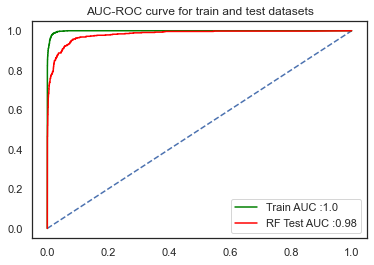

In [88]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, RF_model3_trainprobs),2)
test_auc = round(roc_auc_score(y_test, RF_model3_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_rf = 'RF Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, RF_model3_trainprobs)
fpr_test_rf, tpr_test_rf, thresholds_test = roc_curve(y_test, RF_model3_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_rf, tpr_test_rf, color='red', label=test_label_rf)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9819842679522963
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6555
           1       0.98      0.91      0.94      1327

    accuracy                           0.98      7882
   macro avg       0.98      0.95      0.97      7882
weighted avg       0.98      0.98      0.98      7882

AUC: 0.999


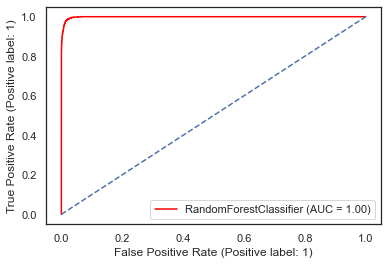

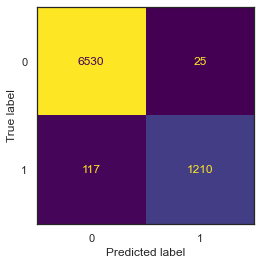

In [89]:
### Evaluation of training dataset
model_eval(RF_model3, X_train, y_train, RF_model3_ytrain_pred, RF_model3_trainprobs)

Accuracy :  0.9496743635287153
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2809
           1       0.90      0.78      0.84       569

    accuracy                           0.95      3378
   macro avg       0.93      0.88      0.91      3378
weighted avg       0.95      0.95      0.95      3378

AUC: 0.981


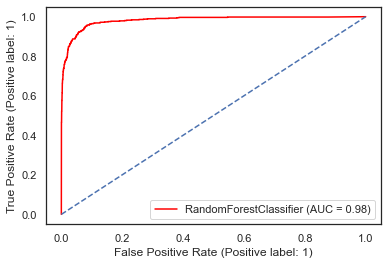

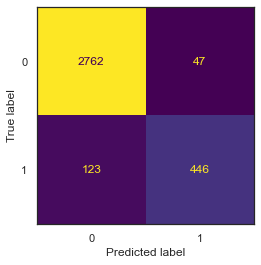

In [90]:
### Evaluation of test dataset
model_eval(RF_model3, X_test, y_test, RF_model3_ytest_pred, RF_model3_testprobs)

**Observations**: This model is showing a lot of overfit across different parameter settings. In the final comparison, RF may not be selected as best model due to this reason.

### Feature importances

In [111]:
imp_df = pd.DataFrame(RF_model1.feature_importances_, index=X.columns, columns=['Feature Importance'])
imp_df

,Feature Importance
Tenure,0.271727
City_Tier,0.034345
CC_Contacted_LY,0.098291
User_Count,0.051148
CC_Score,0.073772
Rev_Permonth,0.075198
Complain_LY,0.068077
Days_Since_CC,0.088242
Payment_Creditcard,0.024044
Payment_Debitcard,0.021274


C:\Users\91984\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1490: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.barh(x, y, w, left=start, log=log, **kwds)


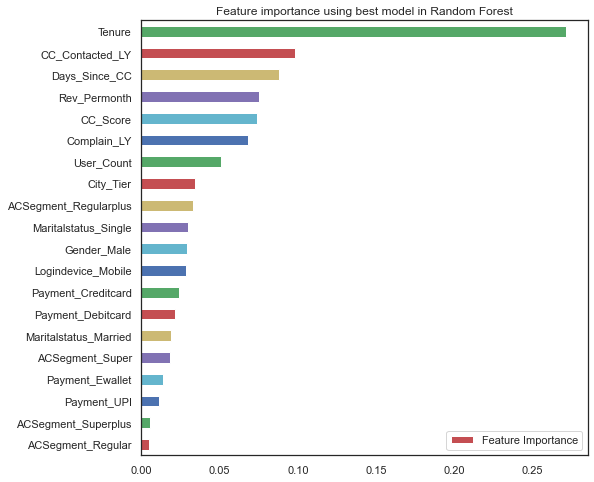

In [112]:
## plotting graph
imp_df = imp_df.sort_values(by='Feature Importance')
my_colors = 'rgbcmy'
#my_colors = ['red','green','blue','black','orange','cyan','magenta','brown']
imp_df.plot(kind='barh', color = my_colors, figsize=(8,8))
plt.title("Feature importance using best model in Random Forest")
plt.show();

## Ensemble model - Adaboost classifier

### ADA_model1 : Default Adaboost classifier

In [93]:
from sklearn.ensemble import AdaBoostClassifier

In [94]:
ADA_model1 = AdaBoostClassifier(n_estimators=51, random_state=1)
ADA_model1 = ADA_model1.fit(X_train, y_train)

In [95]:
### Predicting on train and test dataset
ADA_model1_ytrain_pred = ADA_model1.predict(X_train)
ADA_model1_ytest_pred = ADA_model1.predict(X_test)

## Predicting probabilities on train dataset
ADA_model1_trainprobs = ADA_model1.predict_proba(X_train)
# # keep probabilities for the positive outcome only
ADA_model1_trainprobs = ADA_model1_trainprobs[:, 1]

## Predicting probabilities on test dataset
ADA_model1_testprobs = ADA_model1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
ADA_model1_testprobs = ADA_model1_testprobs[:, 1]

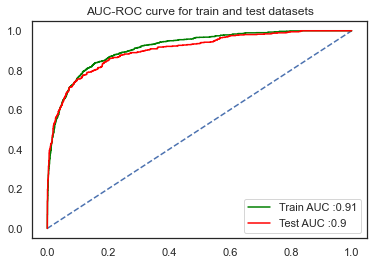

In [96]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, ADA_model1_trainprobs),2)
test_auc = round(roc_auc_score(y_test, ADA_model1_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ADA_model1_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, ADA_model1_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8987566607460036
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6555
           1       0.74      0.61      0.67      1327

    accuracy                           0.90      7882
   macro avg       0.83      0.78      0.80      7882
weighted avg       0.89      0.90      0.89      7882

AUC: 0.915


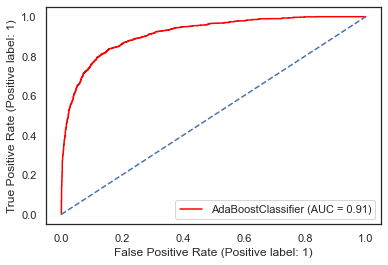

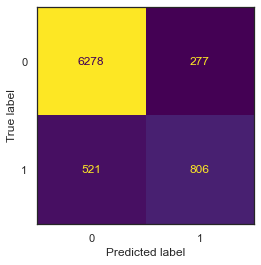

In [97]:
### Evaluation of training dataset
model_eval(ADA_model1, X_train, y_train, ADA_model1_ytrain_pred, ADA_model1_trainprobs)

Accuracy :  0.8993487270574304
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2809
           1       0.75      0.60      0.67       569

    accuracy                           0.90      3378
   macro avg       0.84      0.78      0.80      3378
weighted avg       0.89      0.90      0.89      3378

AUC: 0.903


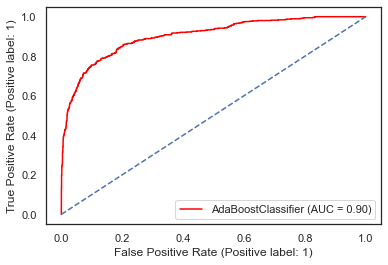

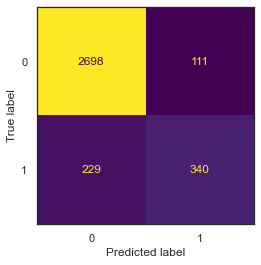

In [98]:
### Evaluation of test dataset
model_eval(ADA_model1, X_test, y_test, ADA_model1_ytest_pred, ADA_model1_testprobs)

### Hyper parameter tuning for Adaboost

In [99]:
param_grid1 = {
    'algorithm': ['SAMME','SAMME.R'],
    'learning_rate': [1,2,3],
    'n_estimators': [51,101,151,201]
}


In [100]:
## Commenting out gridsearch as the best parameters have been hard coded and this piece of code need not be executed in re-runs 
# to save on execution time
#ada = AdaBoostClassifier(random_state=0)

#grid_search = GridSearchCV(estimator = ada, param_grid = param_grid1, cv = 5, scoring='f1')

#grid_search.fit(X_train, y_train)

In [101]:
#grid_search.best_params_

In [102]:
#grid_search.best_score_

In [103]:
ADA_model2 = AdaBoostClassifier(algorithm = 'SAMME.R', learning_rate= 1, n_estimators= 151, random_state=123)
ADA_model2.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=151, random_state=123)

In [104]:
### Predicting on train and test dataset
ADA_model2_ytrain_pred = ADA_model2.predict(X_train)
ADA_model2_ytest_pred = ADA_model2.predict(X_test)

## Predicting probabilities on train dataset
ADA_model2_trainprobs = ADA_model2.predict_proba(X_train)
# # keep probabilities for the positive outcome only
ADA_model2_trainprobs = ADA_model2_trainprobs[:, 1]

## Predicting probabilities on test dataset
ADA_model2_testprobs = ADA_model2.predict_proba(X_test)
# # keep probabilities for the positive outcome only
ADA_model2_testprobs = ADA_model2_testprobs[:, 1]

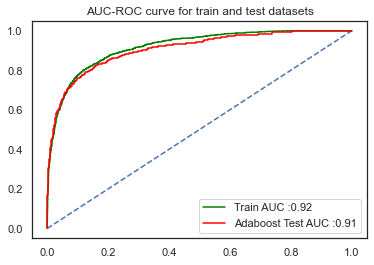

In [105]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, ADA_model2_trainprobs),2)
test_auc = round(roc_auc_score(y_test, ADA_model2_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_ada = 'Adaboost Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, ADA_model2_trainprobs)
fpr_test_ada, tpr_test_ada, thresholds_test_ada = roc_curve(y_test, ADA_model2_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_ada, tpr_test_ada, color='red', label=test_label_ada)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.8990104034509008
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6555
           1       0.75      0.60      0.67      1327

    accuracy                           0.90      7882
   macro avg       0.84      0.78      0.80      7882
weighted avg       0.89      0.90      0.89      7882

AUC: 0.919


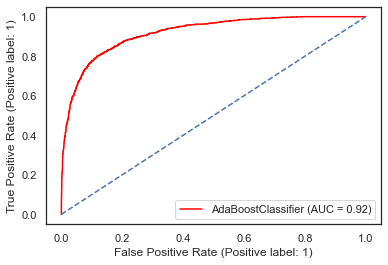

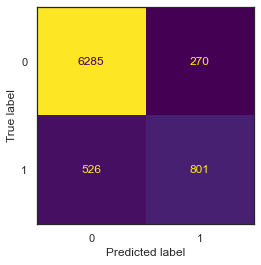

In [106]:
### Evaluation of training dataset
model_eval(ADA_model2, X_train, y_train, ADA_model2_ytrain_pred, ADA_model2_trainprobs)

Accuracy :  0.9014209591474245
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2809
           1       0.76      0.60      0.67       569

    accuracy                           0.90      3378
   macro avg       0.84      0.78      0.81      3378
weighted avg       0.90      0.90      0.90      3378

AUC: 0.907


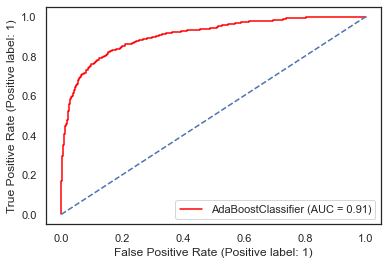

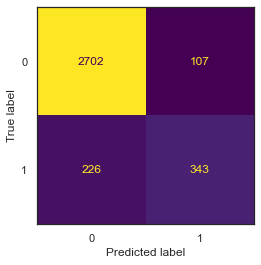

In [107]:
### Evaluation of test dataset
model_eval(ADA_model2, X_test, y_test, ADA_model2_ytest_pred, ADA_model2_testprobs)

**Observations**: Adaboost with the default decision tree classifier as the base estimator overfits on the train dataset. 

#### Feature importance 

In [108]:
ADA_model2.feature_importances_

array([0.41721854, 0.01324503, 0.12582781, 0.0397351 , 0.01324503,
       0.07284768, 0.01324503, 0.14569536, 0.02649007, 0.02649007,
       0.01986755, 0.01986755, 0.00662252, 0.00662252, 0.        ,
       0.01986755, 0.00662252, 0.00662252, 0.00662252, 0.01324503])

In [113]:
imp_df = pd.DataFrame(ADA_model2.feature_importances_, index=X.columns, columns=['Feature Importance'])
imp_df

,Feature Importance
Tenure,0.417219
City_Tier,0.013245
CC_Contacted_LY,0.125828
User_Count,0.039735
CC_Score,0.013245
Rev_Permonth,0.072848
Complain_LY,0.013245
Days_Since_CC,0.145695
Payment_Creditcard,0.026490
Payment_Debitcard,0.026490


C:\Users\91984\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1490: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.barh(x, y, w, left=start, log=log, **kwds)


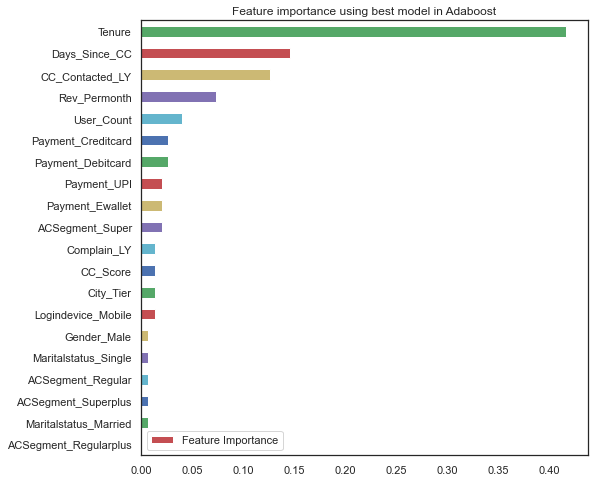

In [114]:
## plotting graph
imp_df = imp_df.sort_values(by='Feature Importance')
my_colors = 'rgbcmy'
#my_colors = ['red','green','blue','black','orange','cyan','magenta','brown']
imp_df.plot(kind='barh', color = my_colors, figsize=(8,8))
plt.title("Feature importance using best model in Adaboost")
plt.show();

## Gradient boost - ensemble method

### GB_model1 : Base model

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [116]:

GB_model1 = GradientBoostingClassifier(n_estimators = 51,random_state=1)
GB_model1 = GB_model1.fit(X_train, y_train)

In [117]:
### Predicting on train and test dataset
GB_model1_ytrain_pred = GB_model1.predict(X_train)
GB_model1_ytest_pred = GB_model1.predict(X_test)

## Predicting probabilities on train dataset
GB_model1_trainprobs = GB_model1.predict_proba(X_train)
# # keep probabilities for the positive outcome only
GB_model1_trainprobs = GB_model1_trainprobs[:, 1]

## Predicting probabilities on test dataset
GB_model1_testprobs = GB_model1.predict_proba(X_test)
# # keep probabilities for the positive outcome only
GB_model1_testprobs = GB_model1_testprobs[:, 1]

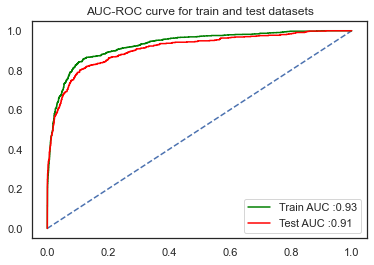

In [118]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, GB_model1_trainprobs),2)
test_auc = round(roc_auc_score(y_test, GB_model1_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label = 'Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, GB_model1_trainprobs)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, GB_model1_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test, tpr_test, color='red', label=test_label)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  0.9104288251712763
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      6555
           1       0.82      0.61      0.69      1327

    accuracy                           0.91      7882
   macro avg       0.87      0.79      0.82      7882
weighted avg       0.91      0.91      0.90      7882

AUC: 0.930


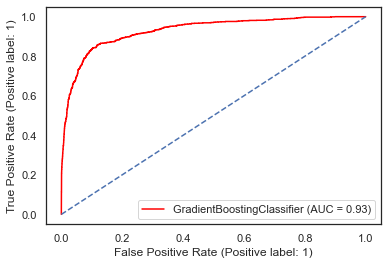

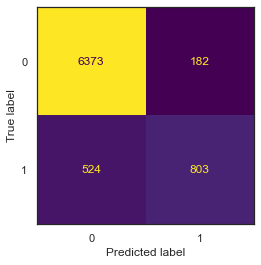

In [119]:
### Evaluation of training dataset
model_eval(GB_model1, X_train, y_train, GB_model1_ytrain_pred, GB_model1_trainprobs)

Accuracy :  0.9058614564831261
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      2809
           1       0.82      0.57      0.67       569

    accuracy                           0.91      3378
   macro avg       0.87      0.77      0.81      3378
weighted avg       0.90      0.91      0.90      3378

AUC: 0.910


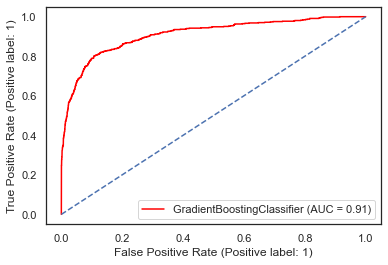

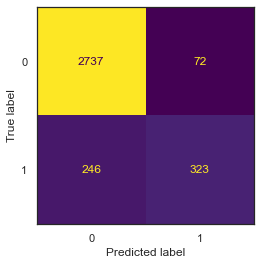

In [120]:
### Evaluation of test dataset
model_eval(GB_model1, X_test, y_test, GB_model1_ytest_pred, GB_model1_testprobs)

### GB_model2 : Hyper parameter tuning using GridSearchCV

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

In [121]:
param_grid1 = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.1,0.5],
#    'n_estimators': [51,101,151],
#    'criterion': ['friedman_mse', 'mse', 'mae'],
    'min_samples_split': [20,60,100],
    'min_samples_leaf': [2,6,10],
    'max_depth':[3,6,9],
    'max_features':[7,10]
}
## Best parameters for above grid is learning_rate=0.5, max_depth=9, max_features=10,min_samples_leaf=6, min_samples_split=20
## loss = deviance.  Above is for 100 estimators and friedman_mse which are default. Best f1_score = 0.917

param_grid2 = {
    'loss': ['deviance'],  # 'exponential'
    'learning_rate': [0.5],
    'n_estimators': [101],
    'criterion': ['mse'], #
    'min_samples_split': [20],
    'min_samples_leaf': [6],
    'max_depth':[9],
    'max_features':[10]
}  # Trying different criterion ('mse') for same best grid settings as grid1
## For mse, score has slightly improved to 0.9124. Now let us try for mae as well.

param_grid3 = {
    'loss': ['deviance'],  
    'learning_rate': [0.5],
    'n_estimators': [101],
    'criterion': ['mae'], #
    'min_samples_split': [20],
    'min_samples_leaf': [6],
    'max_depth':[9],
    'max_features':[10]
}  # Trying different criterion ('mse') for same best grid settings as grid1
## For mse, score has slightly improved to 0.9124. Now let us try for mae as well.
## mae keeps running forever. So, we'll stick to mse and vary other parameters of the grid to improve f1-score


param_grid4 = {
    'loss': ['deviance'],  
    'learning_rate': [0.5],
    'n_estimators': [101,151,201],
    'criterion': ['mse'], 
    'min_samples_split': [20],
    'min_samples_leaf': [6],
    'max_depth':[9],
    'max_features':[10]
}  # increasing just estimators for same best grid settings as grid1 with mse
## f1_score = 0.92. Increases with increase in estimators. Let's try for higher number of estimators in next round.

param_grid5 = {
    'loss': ['deviance'],  
    'learning_rate': [0.5],
    'n_estimators': [201,401,601],
    'criterion': ['mse'], 
    'min_samples_split': [20],
    'min_samples_leaf': [6],
    'max_depth':[9],
    'max_features':[10]
}  # estimators settled at 201 with almost same f1_score of 0.9205. Fixing it at 201 and varying other features in next round

param_grid6 = {
    'loss': ['deviance'],  
    'learning_rate': [0.5],
    'n_estimators': [201],
    'criterion': ['mse'], 
    'min_samples_split': [20],
    'min_samples_leaf': [6],
    'max_depth':[9,12,15],
    'max_features':[10,11,12]
}  # estimators settled at 201 with almost same f1_score of 0.92. Fixing it at 201 and varying other parameters in next round
# Result: GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,max_features=10, min_samples_leaf=6,
#                           min_samples_split=20, n_estimators=201,random_state=0)
# f1_Score: Not improved - same at 0.9205
# max_depth and max_features have settled at 9 and 10 as in previous parameters
# We'll slightly reduce min_samples_split and min_samples_leaf in next round


param_grid7 = {
    'loss': ['deviance'],  
    'learning_rate': [0.5],
    'n_estimators': [201],
    'criterion': ['mse'], 
    'min_samples_split': [20,15],
    'min_samples_leaf': [4,6],
    'max_depth':[9,11],
    'max_features':[10,11]
}  
# Result: GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,max_features=11, min_samples_leaf=6,
#                           min_samples_split=15, n_estimators=201,random_state=0)
            
# f1_Score: 0.9215
# In the next iteration, we will fix all values as per the best parameters above and only tune learning rate

param_grid8 = {
    'loss': ['deviance'],  
    'learning_rate': [0.1, 0.5, 1],
    'n_estimators': [201],
    'criterion': ['mse'], 
    'min_samples_split': [15],
    'min_samples_leaf': [6],
    'max_depth':[9],
    'max_features':[11]
}  
# Result: GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,max_features=11, min_samples_leaf=6,
#                           min_samples_split=15, n_estimators=201,random_state=0)
            
# f1_Score: 0.9215
# Learning rate settled at middle value of 0.5. We'll finalize this parameter set and evaluate on train and test



In [122]:
## Commenting out grid search as the best parameters have been hard coded
## Saving up execution time on re-runs by not running this piece of code

#GB = GradientBoostingClassifier(random_state=0)
#grid_search = GridSearchCV(estimator = GB, param_grid = param_grid8, cv = 3, scoring='f1', n_jobs=-1)
#grid_search.fit(X_train, y_train)

In [123]:
#grid_search.best_score_

In [124]:
#grid_search.best_estimator_

In [125]:
#grid_search.best_params_

Taking the best parameters and hard coding so that Gridsearch can be commented so as not to take additional execution time during reruns

In [27]:
GB_model2 = GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=11, min_samples_leaf=6,
                           min_samples_split=15, n_estimators=201,
                           random_state=0)

In [28]:
GB_model2.fit(X_train, y_train)

GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=11, min_samples_leaf=6,
                           min_samples_split=15, n_estimators=201,
                           random_state=0)

In [29]:
### Predicting on train and test dataset
GB_model2_ytrain_pred = GB_model2.predict(X_train)
GB_model2_ytest_pred = GB_model2.predict(X_test)

## Predicting probabilities on train dataset
GB_model2_trainprobs = GB_model2.predict_proba(X_train)
# # keep probabilities for the positive outcome only
GB_model2_trainprobs = GB_model2_trainprobs[:, 1]

## Predicting probabilities on test dataset
GB_model2_testprobs = GB_model2.predict_proba(X_test)
# # keep probabilities for the positive outcome only
GB_model2_testprobs = GB_model2_testprobs[:, 1]

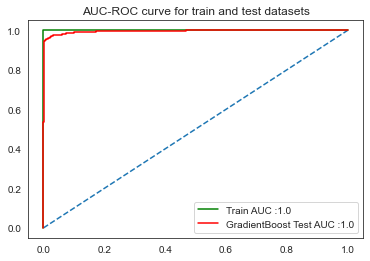

In [30]:
# # calculate AUC and plot roc curve
train_auc = round(roc_auc_score(y_train, GB_model2_trainprobs),2)
test_auc = round(roc_auc_score(y_test, GB_model2_testprobs),2)
train_label = 'Train AUC :' + str(train_auc)
test_label_gb = 'GradientBoost Test AUC :' + str(test_auc)


fpr_train, tpr_train, thresholds_train = roc_curve(y_train, GB_model2_trainprobs)
fpr_test_gb, tpr_test_gb, thresholds_test_gb = roc_curve(y_test, GB_model2_testprobs)

# # plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_train, tpr_train, color='green',label=train_label)
plt.plot(fpr_test_gb, tpr_test_gb, color='red', label=test_label_gb)
plt.legend(loc='best')
plt.title("AUC-ROC curve for train and test datasets")
plt.show();

Accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882

AUC: 1.000


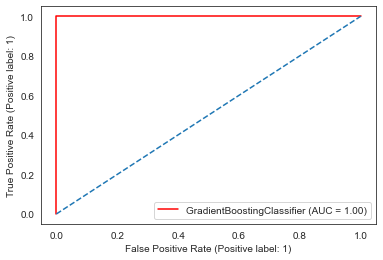

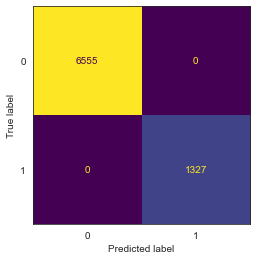

In [31]:
### Evaluation of training dataset
model_eval(GB_model2, X_train, y_train, GB_model2_ytrain_pred, GB_model2_trainprobs)

Accuracy :  0.9875666074600356
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2809
           1       0.99      0.94      0.96       569

    accuracy                           0.99      3378
   macro avg       0.99      0.97      0.98      3378
weighted avg       0.99      0.99      0.99      3378

AUC: 0.995


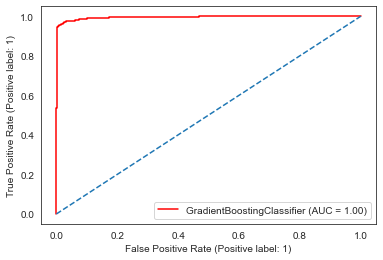

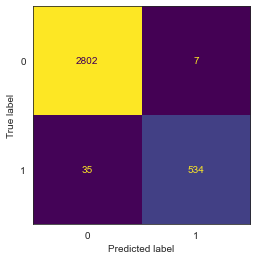

In [32]:
### Evaluation of test dataset
model_eval(GB_model2, X_test, y_test, GB_model2_ytest_pred, GB_model2_testprobs)

### Cross validating on entire dataset to verify the scores

In [132]:
from sklearn.model_selection import cross_val_score

## 5-fold cross validation on full data
GB_cv = GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=11, min_samples_leaf=6,
                           min_samples_split=15, n_estimators=201,
                           random_state=0)
scores = cross_val_score(GB_cv, X, y, cv=5, scoring='f1')
scores, scores.mean()

(array([0.95135135, 0.97333333, 0.9717362 , 0.97240473, 0.94289509]),
 0.9623441412399434)

In [133]:
## 10-fold cross validation on full data
GB_cv = GradientBoostingClassifier(criterion='mse', learning_rate=0.5, max_depth=9,
                           max_features=11, min_samples_leaf=6,
                           min_samples_split=15, n_estimators=201,
                           random_state=0)
scores = cross_val_score(GB_cv, X, y, cv=10, scoring='f1')
scores, scores.mean()

(array([0.98133333, 0.98143236, 0.97883598, 0.98143236, 0.97297297,
        0.97082228, 0.9762533 , 0.9895288 , 0.96825397, 0.96495957]),
 0.976582491874648)

 **Observations:** From the 5-fold and 10-fold cross validation metrics above, the following can be observed. 
 1. Cross-validation scores on entire data are consistent with the test scores 
 2. The mean f1-score for 10-fold cross validation is 1.4% more than 5-fold cross validation. When there is more data to train, the f1-score for minority class gets even better. Hence, before implementation, the model should be trained on complete set of observations.

### Feature importance

Out of all the models, Gradient boost with tuned and optimized hyper parameters on scaled, outlier treated data has performed the best. This will be the final recommended model. The features ranked by importance are given in the below table and plot. 

In [134]:
GB_importance = pd.DataFrame(GB_model2.feature_importances_, index=X.columns, columns=['importance'])

In [135]:
GB_importance.sort_values('importance', axis=0, ascending=False, inplace=True)

In [136]:
GB_importance

,importance
Tenure,0.347413
Days_Since_CC,0.106137
CC_Contacted_LY,0.074286
Complain_LY,0.065411
CC_Score,0.064869
Rev_Permonth,0.058515
City_Tier,0.036665
User_Count,0.032976
Payment_Creditcard,0.028027
Maritalstatus_Single,0.027113


C:\Users\91984\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1490: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.barh(x, y, w, left=start, log=log, **kwds)


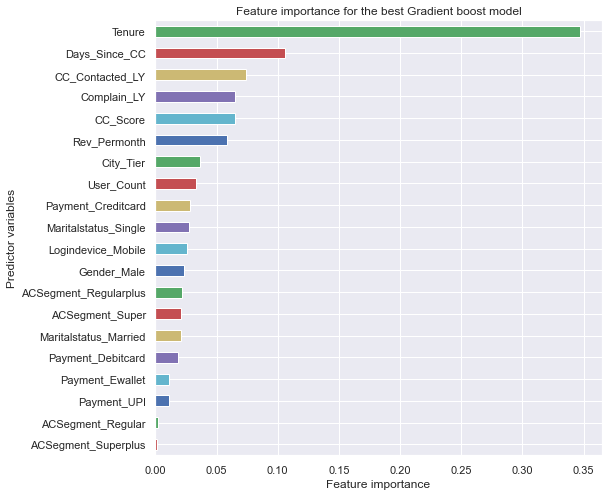

In [137]:
## plotting graph
sns.set()
my_colors = 'rgbcmy'
GB_importance = GB_importance.sort_values(by='importance')
GB_importance.plot(kind='barh', color = my_colors, figsize=(8,8), legend=None)
plt.title("Feature importance for the best Gradient boost model")
plt.xlabel("Feature importance")
plt.ylabel("Predictor variables")
plt.show();



**Observations** 
1. Tenure, Days_Since_CC, CC_Contacted_LY, Complain_LY, CC_Score and Rev_Permonth all have significant importance as per the model. Tenure has the most significant bearing on the model predictions. It is 3 times more than the next highest feature. 
2. It can be observed that ACSegment_Regular and ACSegment_Superplus have very less feature importance in the order of 0.002 and 0.001 respectively. 
3. The other features have a moderate bearing on the model.

## Comparative ROC curve for this notebook

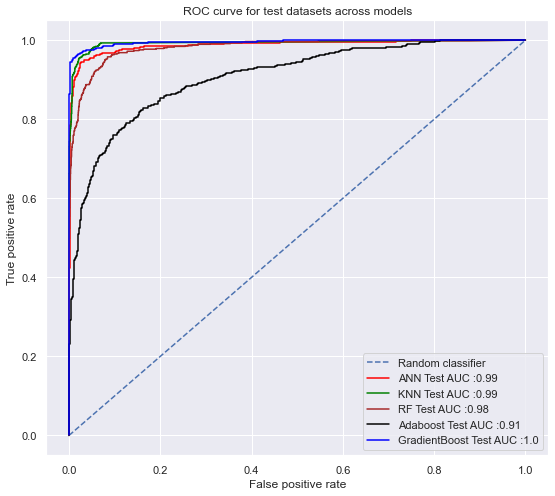

In [138]:
# # plot the roc curve for the model
plt.figure(figsize=(9,8))
plt.plot([0, 1], [0, 1], linestyle='--',label='Random classifier')
plt.plot(fpr_test_ann, tpr_test_ann, color='red', label=test_label_ann)
plt.plot(fpr_test_knn, tpr_test_knn, color='green', label=test_label_knn)
plt.plot(fpr_test_rf, tpr_test_rf, color='brown', label=test_label_rf)
plt.plot(fpr_test_ada, tpr_test_ada, color='black', label=test_label_ada)
plt.plot(fpr_test_gb, tpr_test_gb, color='blue', label=test_label_gb)
plt.legend(loc='best')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for test datasets across models")
plt.show();

## Comprehensive ROC plot for all models from both part 1 and 2 notebooks

In [139]:
# # plot comprehensive roc curve for all models across both the notebooks
### Read tpr, fpr values from part 1 written to disk

ROC_LR = pd.read_csv('ROC_LR.csv')
ROC_LDA = pd.read_csv('ROC_LDA.csv')
ROC_SVM = pd.read_csv('ROC_SVM.csv')

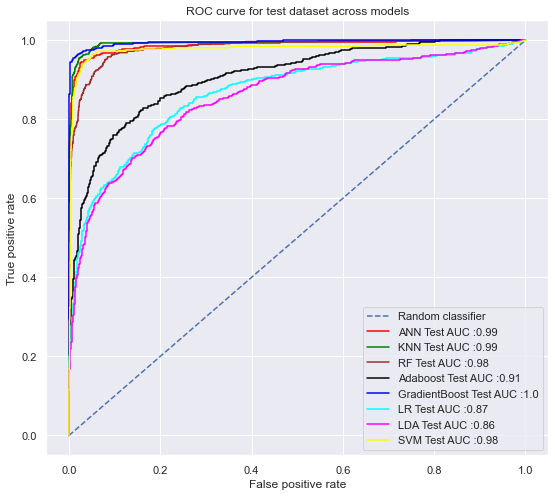

In [140]:
# # plot comprehensive roc curve for all models across both the notebooks
plt.figure(figsize=(9,8))
plt.plot([0, 1], [0, 1], linestyle='--',label='Random classifier')
plt.plot(fpr_test_ann, tpr_test_ann, color='red', label=test_label_ann)
plt.plot(fpr_test_knn, tpr_test_knn, color='green', label=test_label_knn)
plt.plot(fpr_test_rf, tpr_test_rf, color='brown', label=test_label_rf)
plt.plot(fpr_test_ada, tpr_test_ada, color='black', label=test_label_ada)
plt.plot(fpr_test_gb, tpr_test_gb, color='blue', label=test_label_gb)
plt.plot(ROC_LR['fpr_test_LR'], ROC_LR['tpr_test_LR'], color='cyan', label='LR Test AUC :0.87')
plt.plot(ROC_LDA['fpr_test_LDA'], ROC_LDA['tpr_test_LDA'], color='magenta', label='LDA Test AUC :0.86')
plt.plot(ROC_SVM['fpr_test_SVM'], ROC_SVM['tpr_test_SVM'], color='yellow', label='SVM Test AUC :0.98')

plt.legend(loc='best')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve for test dataset across models")
plt.show();

**Observations:** Gradient Boost, ANN, KNN have performed very well. Adaboost, Logistic regression and LDA have relatively poor AUC scores. Gradient Boost has the best and highest possible AUC score of 1.

## RFM Analysis

### For the sake of segmentation, we will define RFM as follows:

The following three parameters are very important from churn perspective and in terms of which customers are valuable to keep
- Recency - Based on Tenure. Low tenure <=2 -> High Recency
- Frequency - Number of customer care calls. More calls >=17 -> High Frequency
- Monetary - Revenue per month. More Revenue >=7 -> High monetary

This will give rise to 6 segments. Based on the count in each segment, the thresholds can be adjusted and based on budgets, they can be addressed

In [72]:
### Write the dataset along with predictions into excel file for RFM analysis
df_train_predict = pd.concat([X_train_bkup,pd.DataFrame(y_train)], axis=1)
df_test_predict = pd.concat([X_test_bkup,pd.DataFrame(y_test)], axis=1)

df_train_predict['Predict_churn'] = GB_model2_ytrain_pred
df_test_predict['Predict_churn'] = GB_model2_ytest_pred

df_predicted = pd.concat([df_train_predict, df_test_predict], axis=0)


##Defining new columns with Recency, Frequency and Monetary based on above definition
df_predicted['Recency'] = np.where(df_predicted['Tenure'] <= 2 , 'High', 'Low')   ##Low Tenure --> High Recency
df_predicted['Frequency'] = np.where(df_predicted['CC_Contacted_LY'] >= 17 , 'High', 'Low')
df_predicted['Monetary'] = np.where(df_predicted['Rev_Permonth'] >= 7 , 'High', 'Low')

In [73]:
df_train_predict.to_excel("Gradient boost predicted train file.xlsx")
df_test_predict.to_excel("Gradient boost predicted test file.xlsx")
df_predicted.to_excel("Gradient boost predicted train+test file.xlsx")

## Conclusion

A model can be defined as unique combination of an algorithm, its hyperparameters and underlying data used (subjected to specific preprocessing treatment).

In this exercise, the best f1 score has been obtained from Gradient boost algorithm using a combination of Gridsearch and manually tuned hyperparameters fitted on cleaned, null imputed (using KNN), outlier treated (flooring/capping) and scaled (Standard scaled) data from which few variables had been dropped due to low correlation with target variable and few others because of high VIF.

Tenure, Days_Since_CC, CC_Contacted_LY, Complain_LY, CC_Score and Rev_Permonth all have significant importance as per the model. Tenure has the most significant bearing on the model predictions. Together these 6 variables have a 71.4% importance of the total 20 variables that have been fed to the model.